In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:
data = pd.read_csv('loan_data.csv')
data.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
data.shape

(45000, 14)

In [ ]:
data.select_dtypes(include=['object']).columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
objects_df = data.select_dtypes(include='object').columns
for col in objects_df:
    print(f"{col}:")
    print(data[col].unique())

person_gender:
['female' 'male']
person_education:
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership:
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent:
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file:
['No' 'Yes']


In [ ]:
data.shape

(45000, 14)

In [ ]:
#6.Посчитать средний доход, возраст, стаж.
income = data['person_income'].mean().round(2)
age = data['person_age'].mean()
experience = data['person_emp_exp'].mean()
print(f"Средний доход: {income}")
print(f"Средний возраст: {age}")
print(f"Средний стаж: {experience}")

Средний доход: 80319.05
Средний возраст: 27.76417777777778
Средний стаж: 5.410333333333333


<Axes: xlabel='person_age', ylabel='Count'>

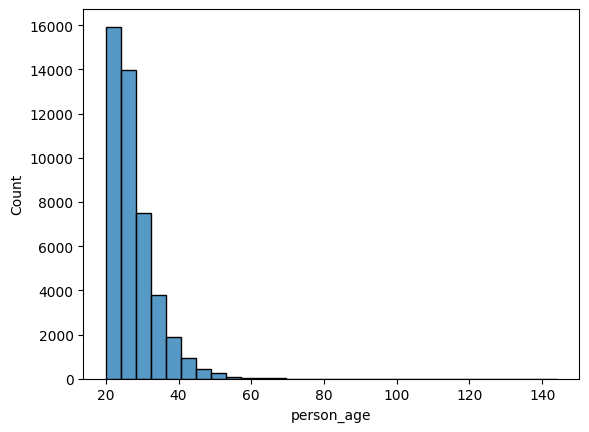

In [ ]:
sns.histplot(data=data, x='person_age',bins=30)

In [ ]:
new_data = data[['person_age','person_income','person_emp_exp','person_home_ownership',
                 'loan_amnt','loan_int_rate','credit_score','loan_status']]

In [ ]:
new_data.to_csv('new_loan.csv')


In [ ]:
data[['person_age','person_income','person_emp_exp']].mean().round()

,0
person_age,28.0
person_income,80319.0
person_emp_exp,5.0


In [ ]:
#7.Сколько заемщиков имеют кредитный балл < 600?
(data['credit_score'] < 600).sum()

np.int64(10828)

In [ ]:
#8.Распределение по типу жилья (person_home_ownership) — value_counts().
((data['person_home_ownership'].value_counts(normalize=True)) * 100).round(2)

,proportion
person_home_ownership,
RENT,52.10
MORTGAGE,41.09
OWN,6.56
OTHER,0.26


In [ ]:
#9.Средняя ставка и сумма кредита по группам loan_status.
data.groupby('loan_status')[['loan_amnt','loan_int_rate']].mean().round()

,loan_amnt,loan_int_rate
loan_status,,
0,9220.0,10.0
1,10856.0,13.0


In [ ]:
(data['person_emp_exp'] == 0).sum()

np.int64(9566)

In [ ]:
#Сколько заемщиков берут кредит более чем на половину дохода
(data['loan_percent_income'] > 0.5).sum()

np.int64(55)

In [ ]:
#12.Группировка по person_home_ownership — средний loan_int_rate.
data.groupby('person_home_ownership')['loan_int_rate'].mean().round(2)

,loan_int_rate
person_home_ownership,
MORTGAGE,10.56
OTHER,12.03
OWN,10.83
RENT,11.38


<Axes: xlabel='person_income', ylabel='Count'>

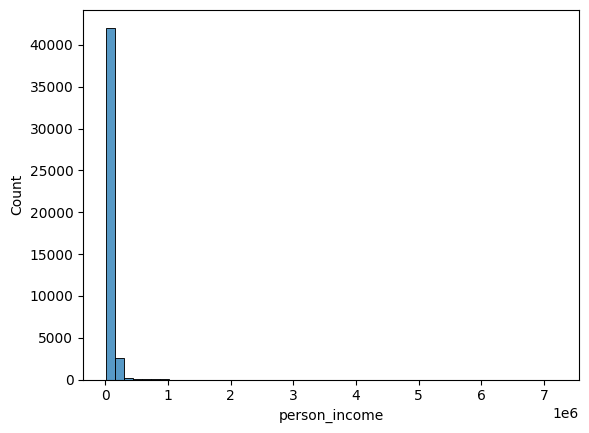

In [ ]:
# #13.Hist / distplot по:
# operson_income
# ocredit_score
# oloan_int_rate
sns.histplot(data=data, x='person_income', bins=50)


In [ ]:
data['person_income']

,person_income
0,71948.0
1,12282.0
2,12438.0
3,79753.0
4,66135.0
...,...
44995,47971.0
44996,65800.0
44997,56942.0
44998,33164.0


<Axes: xlabel='credit_score', ylabel='Count'>

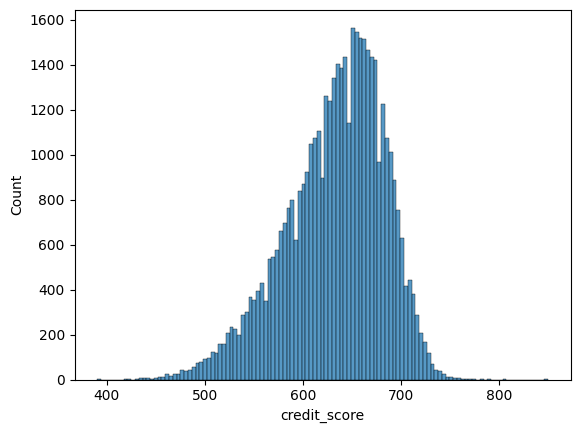

In [ ]:
sns.histplot(data=data, x='credit_score')

<Axes: xlabel='loan_int_rate', ylabel='Count'>

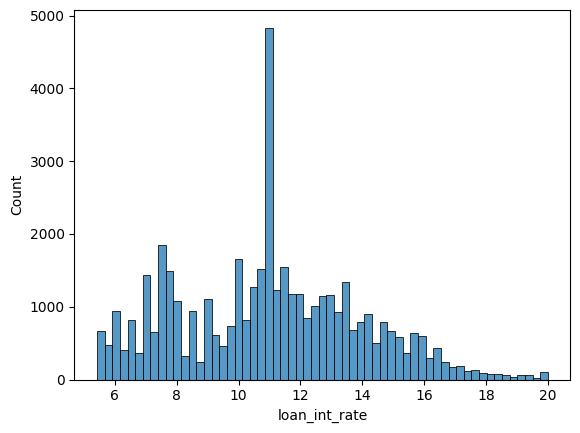

In [ ]:
sns.histplot(data=data, x='loan_int_rate')

<Axes: xlabel='loan_status', ylabel='person_income'>

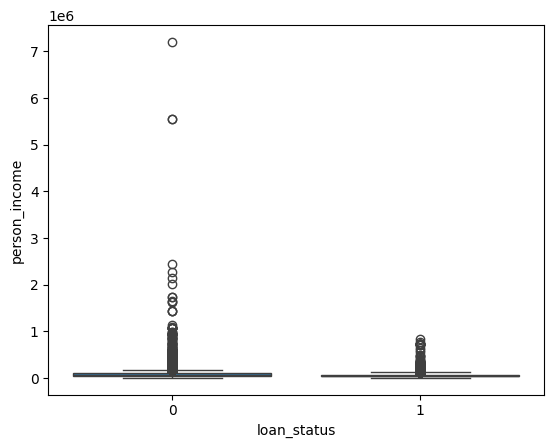

In [ ]:
sns.boxplot(data=data, x='loan_status', y='person_income')

In [ ]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


<Axes: xlabel='person_home_ownership', ylabel='loan_status'>

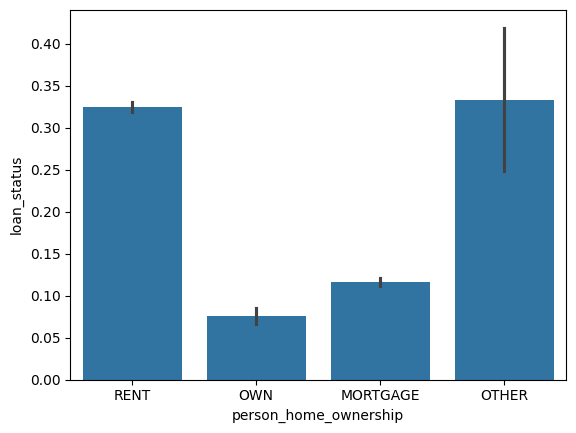

In [ ]:
sns.barplot(data=data, x='person_home_ownership', y='loan_status')

In [ ]:
data['loan_status']

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
data['person_gender'] = data['person_gender'].map({'male': 1, 'female': 0})
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data.drop(columns='loan_status'))


ValueError: could not convert string to float: 'Master'

In [ ]:
x = scaled_data
y = data['loan_status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_predict = logistic_model.predict(x_test)

In [ ]:
accuracy_score(y_predict, y_test)

0.8836666666666667

In [ ]:
joblib.dump(logistic_model, 'model_log.pkl')
joblib.dump(scaler, 'scaler_log.pkl')

['scaler_log.pkl']

Short_data

In [ ]:
new_data

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,credit_score,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22,71948,0,35000,16,561,1,0,0,1
1,21,12282,0,1000,11,504,0,0,1,0
2,25,12438,3,5500,12,635,1,0,0,0
3,23,79753,0,35000,15,675,1,0,0,1
4,24,66135,1,35000,14,586,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
44995,27,47971,6,15000,15,645,1,0,0,1
44996,37,65800,17,9000,14,621,1,0,0,1
44997,33,56942,7,2771,10,668,1,0,0,1
44998,29,33164,4,12000,13,604,1,0,0,1


In [ ]:
new_data = pd.get_dummies(new_data, columns=['person_home_ownership'], drop_first=True).astype(int)

In [ ]:
scaler_new = StandardScaler()

In [ ]:
scaled = scaler_new.fit_transform(new_data.drop(columns='loan_status'))

In [ ]:
a = scaled
b = new_data['loan_status']

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=4)

In [ ]:
log_model_new = LogisticRegression()

In [ ]:
log_model_new.fit(a_train, b_train)

LogisticRegression()

In [ ]:
b_predict = log_model_new.predict(a_test)

In [ ]:
accuracy_score(b_predict, b_test)

0.84

In [ ]:
joblib.dump(logistic_model, 'model_log_short.pkl')
joblib.dump(scaler_new, 'scaler_short_loan.pkl')

['scaler_short_loan.pkl']

In [ ]:
new_data.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'credit_score', 'loan_status',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')

In [ ]:
print(new_data.drop(columns='loan_status').columns.tolist())


['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'credit_score', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT']
